In [14]:
import dask.dataframe as dd
import matplotlib.pyplot as plt

# Define dtypes for the problematic columns
dtype_dict = {
    'County Name': 'object',  # Treat 'County Name' as a string
    'State Postal Code': 'object'  # Treat 'State Postal Code' as a string
}

# Load the datasets with specified dtypes
df = dd.read_csv("Trips_by_Distance (1).csv", assume_missing=True, parse_dates=["Date"], dtype=dtype_dict)
df_full = dd.read_csv("Trips_Full Data (2).csv", assume_missing=True, parse_dates=["Date"], dtype=dtype_dict)

# Add 'Week' column
df['Week'] = df['Date'].dt.isocalendar().week
df_full['Week'] = df_full['Date'].dt.isocalendar().week

# Just check it worked
df.head(), df_full.head()


(      Level       Date  State FIPS State Postal Code  County FIPS County Name  \
 0  National 2019-01-01         NaN              <NA>          NaN        <NA>   
 1  National 2019-01-02         NaN              <NA>          NaN        <NA>   
 2  National 2019-01-03         NaN              <NA>          NaN        <NA>   
 3  National 2019-01-04         NaN              <NA>          NaN        <NA>   
 4  National 2019-01-05         NaN              <NA>          NaN        <NA>   
 
    Population Staying at Home  Population Not Staying at Home  \
 0                  77433867.0                     248733553.0   
 1                  61305201.0                     264862219.0   
 2                  63050480.0                     263116940.0   
 3                  61803652.0                     264363768.0   
 4                  64389745.0                     261777675.0   
 
    Number of Trips  Number of Trips <1  ...  Number of Trips 5-10  \
 0     8.977844e+08         241667151.

In [19]:
# Filter to National data
df_national = df[df["Level"] == "National"]

# Group by week and average people staying at home
weekly_stay_home = df_national.groupby("Week")["Population Staying at Home"].mean().compute()
weekly_stay_home = weekly_stay_home.reset_index()
weekly_stay_home.columns = ["Week", "Avg_Pop_Staying_Home"]

print(weekly_stay_home.head())


   Week  Avg_Pop_Staying_Home
0     1          7.380314e+07
1     2          7.122369e+07
2     3          7.005955e+07
3     4          7.017939e+07
4     5          6.947983e+07


In [20]:
# Use the full trip data
df_full_national = df_full[df_full["Level"] == "National"]

# Group by week and average distance-based trips
distance_cols = ["Trips 1-25 Miles", "Trips 25-100 Miles", "Trips 100+ Miles"]

weekly_distance = df_full_national.groupby("Week")[distance_cols].mean().compute()
weekly_distance = weekly_distance.reset_index()
weekly_distance.columns = ["Week", "1-25 Miles", "25-100 Miles", "100+ Miles"]

print(weekly_distance.head())


   Week    1-25 Miles  25-100 Miles    100+ Miles
0    31  9.349578e+08    15338786.0  7.942912e+07
1    32  1.028988e+09    11586421.0  8.947218e+07


In [21]:
import dask.dataframe as dd

# Load the second dataset
df_full = dd.read_csv("Trips_Full Data (2).csv", assume_missing=True, parse_dates=["Date"])

# Create a Week column (if it's not already parsed correctly)
df_full['Week'] = df_full['Date'].dt.isocalendar().week

# Group by week and calculate mean distances
weekly_distance = df_full.groupby("Week")[["Trips 1-25 Miles", "Trips 25-100 Miles", "Trips 100+ Miles"]].mean().compute().reset_index()

# Optional: rename for easier plotting
weekly_distance.columns = ["Week", "1-25 Miles", "25-100 Miles", "100+ Miles"]


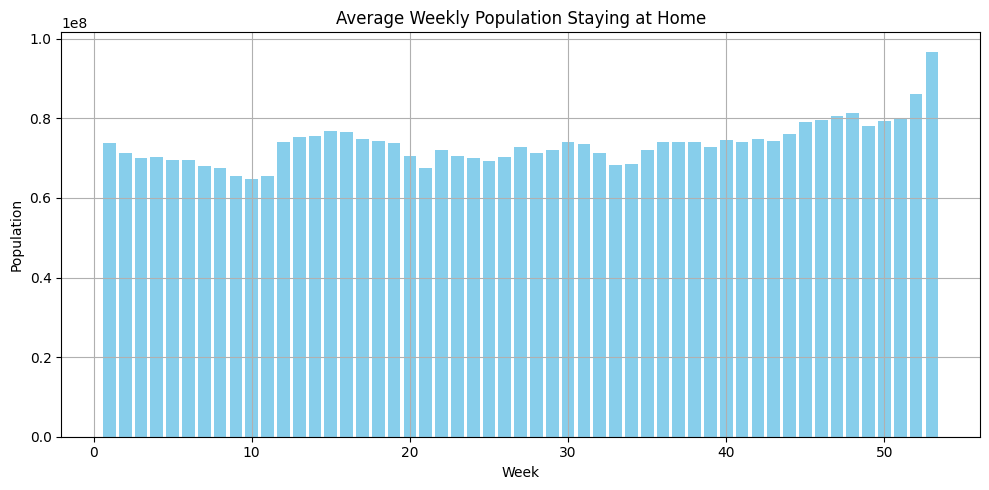

In [22]:
import matplotlib.pyplot as plt 
plt.figure(figsize=(10, 5))
plt.bar(weekly_stay_home["Week"], weekly_stay_home["Avg_Pop_Staying_Home"], color='skyblue')
plt.title("Average Weekly Population Staying at Home")
plt.xlabel("Week")
plt.ylabel("Population")
plt.grid(True)
plt.tight_layout()
plt.savefig("weekly_stay_home.png")  # For stay-at-home plotplt.show()
plt.show()

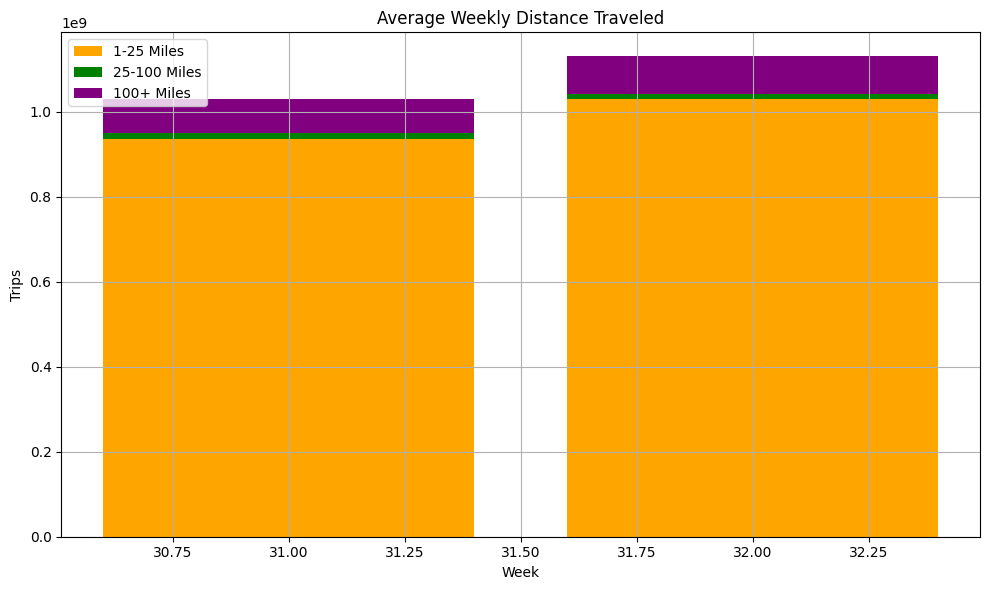

In [9]:
plt.figure(figsize=(10, 6))
plt.bar(weekly_distance["Week"], weekly_distance["1-25 Miles"], label="1-25 Miles", color="orange")
plt.bar(weekly_distance["Week"], weekly_distance["25-100 Miles"], bottom=weekly_distance["1-25 Miles"], label="25-100 Miles", color="green")
plt.bar(
    weekly_distance["Week"],
    weekly_distance["100+ Miles"],
    bottom=weekly_distance["1-25 Miles"] + weekly_distance["25-100 Miles"],
    label="100+ Miles",
    color="purple"
)
plt.title("Average Weekly Distance Traveled")
plt.xlabel("Week")
plt.ylabel("Trips")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.savefig("weekly_trip_distance.png")
plt.show()  
